## Import library

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from google.colab import files

## Import Data

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-22 05:39:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.85MB/s    in 30s     

2021-05-22 05:40:12 (10.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## Preparing data

In [8]:
import zipfile, os

local ='/tmp/rockpaperscissors.zip'
zip = zipfile.ZipFile(local, 'r')
zip.extractall('/tmp')
zip.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [9]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock']

In [10]:
os.remove('/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'scissors', 'rock']

In [11]:
data_generator = ImageDataGenerator(rescale= 1./255,
                                    horizontal_flip= True,
                                    vertical_flip= True,
                                    zoom_range= 0.3,
                                    rotation_range= 90,
                                    shear_range= 0.3,
                                    validation_split= 0.4)

train = data_generator.flow_from_directory(base_dir,
                                           class_mode= 'categorical',
                                           batch_size= 64,
                                           target_size= (150, 150),
                                           subset='training')

validation = data_generator.flow_from_directory(base_dir,
                                           class_mode= 'categorical',
                                           batch_size= 64,
                                           target_size= (150, 150),
                                           subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## Create  Custom callbacks

In [12]:
class Callbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai lebih dari 95%, Training dihentikan!")
      self.model.stop_training = True

callback = Callbacks()

## Build Model

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                    ])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Fitting model

In [14]:
history = model.fit(train,
                    epochs= 20,
                    verbose= 1,
                    callbacks=[callback],
                    validation_data=validation)

Epoch 1/20
21/21 [==============================] - 49s 2s/step - loss: 1.1020 - accuracy: 0.3690 - val_loss: 1.0200 - val_accuracy: 0.4760
Epoch 2/20
21/21 [==============================] - 47s 2s/step - loss: 0.9367 - accuracy: 0.5436 - val_loss: 0.7850 - val_accuracy: 0.7185
Epoch 3/20
21/21 [==============================] - 52s 2s/step - loss: 0.7272 - accuracy: 0.6987 - val_loss: 0.6328 - val_accuracy: 0.7586
Epoch 4/20
21/21 [==============================] - 47s 2s/step - loss: 0.5906 - accuracy: 0.7515 - val_loss: 0.5775 - val_accuracy: 0.8192
Epoch 5/20
21/21 [==============================] - 47s 2s/step - loss: 0.5292 - accuracy: 0.7945 - val_loss: 0.4546 - val_accuracy: 0.8215
Epoch 6/20
21/21 [==============================] - 46s 2s/step - loss: 0.4634 - accuracy: 0.8091 - val_loss: 0.4161 - val_accuracy: 0.8387
Epoch 7/20
21/21 [==============================] - 46s 2s/step - loss: 0.4451 - accuracy: 0.8173 - val_loss: 0.3723 - val_accuracy: 0.8535
Epoch 8/20
21/21 [==

## Model evaluate

In [15]:
model.evaluate(validation, verbose=1)

14/14 [==============================] - 12s 813ms/step - loss: 0.1356 - accuracy: 0.9554


[0.13557863235473633, 0.9553775787353516]

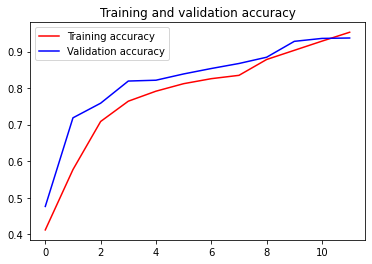

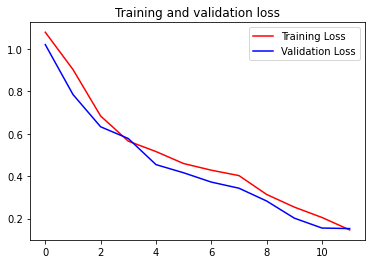

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Predict

In [26]:
class_names = train.class_indices
print(class_names)

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving paper (1).jpeg to paper (1).jpeg
paper


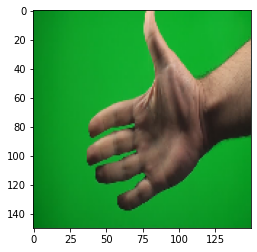

In [35]:
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150, 3))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predict = model.predict(images)
  index = predict[0].argmax()

  for key,value in class_names.items():
    if value == index:
        print(key)
  